<h1 align=center>Stock Analysis</h1>


### `Points`:

- For 3 months to 1 year, you get a balanced view that works for both short-term traders and AI-based market predictions.

- Longer durations (1+ years) are better suited for long-term investors or deeper historical trend analysis.


### Tools

1. fetch data from yahoo finance for 12 months, cause we want short term trading


In [ ]:
# tool: fetch stock price

from typing import Union, Dict
import datetime as dt
import yfinance as yf
import pandas as pd


def get_stock_prices(ticker: str) -> Union[Dict, str]:
    """Fetches historical stock price data and technical indicators for a given ticker."""
    try:
        data = yf.download(
            ticker,
            start=dt.datetime.now() - dt.timedelta(weeks=48),
            end=dt.datetime.now(),
            interval='1wk'
        )

        return data

    except Exception as e:
        return f"Error fetching price data: {str(e)}"

In [124]:
ticker = "AAPL"  # Example: Apple Inc.

# Fetch historical data (e.g., past 3 months)
data = get_stock_prices(ticker)

# Display the fetched data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-05-20,189.343628,192.174126,186.004858,188.695811,208619700
2024-05-27,191.606033,192.353521,188.466591,190.868507,230454300
2024-06-03,196.230484,196.280320,191.875127,192.253844,245994400
2024-06-10,211.778229,219.462394,191.506350,196.240439,635755100
2024-06-17,206.794998,218.216603,206.416266,212.655292,506265500


In [125]:
data["Close"].squeeze()

Date
2024-05-20    189.343628
2024-05-27    191.606033
2024-06-03    196.230484
2024-06-10    211.778229
2024-06-17    206.794998
2024-06-24    209.914490
2024-07-01    225.581833
2024-07-08    229.767761
2024-07-15    223.558640
2024-07-22    217.229904
2024-07-29    219.123550
2024-08-05    215.515686
2024-08-12    225.292816
2024-08-19    226.341843
2024-08-26    228.497101
2024-09-02    220.335068
2024-09-09    222.011368
2024-09-16    227.698853
2024-09-23    227.289749
2024-09-30    226.301941
2024-10-07    227.050293
2024-10-14    234.483932
2024-10-21    230.901810
2024-10-28    222.420486
2024-11-04    226.461594
2024-11-11    224.752884
2024-11-18    229.617538
2024-11-25    237.069351
2024-12-02    242.573288
2024-12-09    247.857483
2024-12-16    254.210510
2024-12-23    255.309296
2024-12-30    243.092728
2025-01-06    236.589874
2025-01-13    229.727417
2025-01-20    222.535324
2025-01-27    235.740814
2025-02-03    227.380005
2025-02-10    244.331375
2025-02-17    245.55

In [ ]:
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.volume import volume_weighted_average_price

indicators = {}

In [141]:
data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)

In [ ]:
rsi_series = RSIIndicator(data['Close'].squeeze(), window=14).rsi().iloc[-12:]
indicators["RSI"] = dict(
    zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), rsi_series)))

In [143]:
indicators["RSI"]

{'2025-02-03': 48.59,
 '2025-02-10': 57.86,
 '2025-02-17': 58.44,
 '2025-02-24': 55.92,
 '2025-03-03': 54.04,
 '2025-03-10': 40.51,
 '2025-03-17': 43.37,
 '2025-03-24': 43.19,
 '2025-03-31': 32.18,
 '2025-04-07': 37.83,
 '2025-04-14': 37.43,
 '2025-04-21': 35.93}

In [ ]:
StochasticOscillator(data['High'].squeeze(), data['Low'].squeeze(
), data['Close'].squeeze(), window=14).stoch().iloc[-8:]

41    49.000128
42     9.864911
43    19.165541
44    18.445598
45     1.578603
46    35.821252
47    34.373055
48    29.112503
Name: stoch_k, dtype: float64

In [ ]:
sto_series = StochasticOscillator(data['High'].squeeze(), data['Low'].squeeze(
), data['Close'].squeeze(), window=14).stoch().iloc[-12:]
indicators["Stochastic_Oscillator"] = dict(
    zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), sto_series)))

In [146]:
indicators["Stochastic_Oscillator"]

{'2025-02-03': 20.26,
 '2025-02-10': 61.94,
 '2025-02-17': 64.93,
 '2025-02-24': 55.81,
 '2025-03-03': 49.0,
 '2025-03-10': 9.86,
 '2025-03-17': 19.17,
 '2025-03-24': 18.45,
 '2025-03-31': 1.58,
 '2025-04-07': 35.82,
 '2025-04-14': 34.37,
 '2025-04-21': 29.11}

In [ ]:
macd = MACD(data['Close'].squeeze())
macd_series = macd.macd().iloc[-12:]
indicators["MACD"] = dict(
    zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), macd_series)))

In [148]:
indicators["MACD"]

{'2025-02-03': 4.22,
 '2025-02-10': 4.71,
 '2025-02-17': 5.15,
 '2025-02-24': 5.13,
 '2025-03-03': 4.84,
 '2025-03-10': 2.52,
 '2025-03-17': 1.05,
 '2025-03-24': -0.14,
 '2025-03-31': -3.43,
 '2025-04-07': -5.19,
 '2025-04-14': -6.6,
 '2025-04-21': -7.97}

In [ ]:
macd_signal_series = macd.macd_signal().iloc[-12:]
indicators["MACD_Signal"] = dict(
    zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), macd_signal_series)))

In [150]:
indicators["MACD_Signal"]

{'2025-02-03': 6.6,
 '2025-02-10': 6.23,
 '2025-02-17': 6.01,
 '2025-02-24': 5.83,
 '2025-03-03': 5.64,
 '2025-03-10': 5.01,
 '2025-03-17': 4.22,
 '2025-03-24': 3.35,
 '2025-03-31': 1.99,
 '2025-04-07': 0.56,
 '2025-04-14': -0.88,
 '2025-04-21': -2.29}

In [ ]:
vwap_series = volume_weighted_average_price(
    data['High'].squeeze(), data['Low'].squeeze(), data['Close'].squeeze(), volume=data['Volume'].squeeze()
).iloc[-12:]
indicators["vwap"] = dict(
    zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), vwap_series)))

In [154]:
indicators["vwap"]

{'2025-02-03': 236.18,
 '2025-02-10': 237.1,
 '2025-02-17': 238.39,
 '2025-02-24': 239.17,
 '2025-03-03': 239.31,
 '2025-03-10': 237.25,
 '2025-03-17': 234.96,
 '2025-03-24': 232.28,
 '2025-03-31': 228.11,
 '2025-04-07': 220.9,
 '2025-04-14': 218.82,
 '2025-04-21': 217.88}

In [173]:
# tool: fetch stock price

from typing import Union, Dict
import datetime as dt
import pandas as pd
import yfinance as yf
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import MACD
from ta.volume import volume_weighted_average_price
from langchain_core.tools import tool


@tool
def get_stock_prices(ticker: str) -> Union[Dict, str]:
    """Fetches historical stock price data and technical indicators for a given ticker."""
    try:
        data = yf.download(
            ticker,
            start=dt.datetime.now() - dt.timedelta(weeks=12),
            end=dt.datetime.now(),
            interval='1wk'
        )

        if data.empty:
            return f"No data found for ticker: {ticker}"

        # reset index so we can access 'Date' as a column
        data.reset_index(inplace=True)
        data['Date'] = data['Date'].astype(str)

        # Technical Indicators - computed on closing prices
        indicators = {}

        # RSI detects overbought/oversold conditions
        # Show last 12 weeks of indicators for a 3-month span
        rsi_series = RSIIndicator(
            data['Close'].squeeze(), window=14).rsi().iloc[-12:]
        indicators["RSI"] = dict(
            zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), rsi_series)))

        # Compares current price to a range of previous prices
        # Another momentum indicator — complements RSI
        sto_series = StochasticOscillator(data['High'].squeeze(), data['Low'].squeeze(
        ), data['Close'].squeeze(), window=14).stoch().iloc[-12:]
        indicators["Stochastic_Oscillator"] = dict(
            zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), sto_series)))

        # MACD is a trend-following indicator (difference of two EMAs)
        # Useful for spotting trend reversals
        macd = MACD(data['Close'].squeeze())
        macd_series = macd.macd().iloc[-12:]
        indicators["MACD"] = dict(
            zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), macd_series)))

        # Signal line is a smoothed version of MACD used to generate buy/sell signals
        macd_signal_series = macd.macd_signal().iloc[-12:]
        indicators["MACD_Signal"] = dict(
            zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), macd_signal_series)))

        # VWAP helps traders understand average price based on volume
        # Commonly used by institutions to assess fair value
        vwap_series = volume_weighted_average_price(
            data['High'].squeeze(), data['Low'].squeeze(), data['Close'].squeeze(), volume=data['Volume'].squeeze()
        ).iloc[-12:]
        indicators["vwap"] = dict(
            zip(data['Date'].iloc[-12:], map(lambda x: round(x, 2), vwap_series)))

        return {
            'stock_price': data.to_dict(orient='records'),
            'indicators': indicators
        }

    except Exception as e:
        return f"Error fetching price data: {str(e)}"

In [167]:
ticker = "AAPL"  # Example: Apple Inc.

# Fetch historical data (e.g., past 3 months)
stock_data = get_stock_prices(ticker)

C:\Users\44787\AppData\Local\Temp\ipykernel_30476\3750346389.py:4: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  stock_data = get_stock_prices(ticker)
[*********************100%***********************]  1 of 1 completed


In [168]:
stock_data

{'stock_price': [{('Date', ''): '2025-01-27',
   ('Close', 'AAPL'): 235.74081420898438,
   ('High', 'AAPL'): 246.91852728753366,
   ('Low', 'AAPL'): 223.73401084463939,
   ('Open', 'AAPL'): 223.77397545038176,
   ('Volume', 'AAPL'): 372790500},
  {('Date', ''): '2025-02-03',
   ('Close', 'AAPL'): 227.3800048828125,
   ('High', 'AAPL'): 233.74300400322835,
   ('Low', 'AAPL'): 225.45211662479315,
   ('Open', 'AAPL'): 229.73741356705622,
   ('Volume', 'AAPL'): 227383400},
  {('Date', ''): '2025-02-10',
   ('Close', 'AAPL'): 244.3313751220703,
   ('High', 'AAPL'): 245.2803287399519,
   ('Low', 'AAPL'): 226.95047545747516,
   ('Open', 'AAPL'): 229.3178829790059,
   ('Volume', 'AAPL'): 226587600},
  {('Date', ''): '2025-02-17',
   ('Close', 'AAPL'): 245.5500030517578,
   ('High', 'AAPL'): 248.69000244140625,
   ('Low', 'AAPL'): 241.83999633789062,
   ('Open', 'AAPL'): 244.14999389648438,
   ('Volume', 'AAPL'): 166541000},
  {('Date', ''): '2025-02-24',
   ('Close', 'AAPL'): 241.8399963378906

2. Retrive financial health ratio

```
Metric            | Meaning
pe_ratio          | Price-to-Earnings (valuation)
price_to_book     | Valuation based on book value
debt_to_equity    | Leverage/solvency ratio
profit_margins    | Net income as % of revenue
return_on_equity  | Efficiency of shareholder equity
return_on_assets  | Profitability relative to assets
current_ratio     | Short-term liquidity
quick_ratio       | Liquidity without inventory
gross_margins     | Efficiency at core product level
operating_margins | Profitability from operations
```

In [171]:
stock = yf.Ticker("AAPL")
info = stock.info
info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [172]:
info.get('forwardPE')

23.066183

In [174]:
@tool
def get_financial_metrics(ticker: str) -> Union[Dict, str]:
    """Fetches key financial ratios for a given ticker."""
    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        if not info:
            return f"No financial data found for ticker: {ticker}"

        def safe_get(key: str) -> Union[float, str]:
            value = info.get(key)
            return round(value, 3) if isinstance(value, (int, float)) else "N/A"

        return {
            'pe_ratio': safe_get('forwardPE'),
            'price_to_book': safe_get('priceToBook'),
            'debt_to_equity': safe_get('debtToEquity'),
            'profit_margins': safe_get('profitMargins'),
            'return_on_equity': safe_get('returnOnEquity'),
            'return_on_assets': safe_get('returnOnAssets'),
            'current_ratio': safe_get('currentRatio'),
            'quick_ratio': safe_get('quickRatio'),
            'gross_margins': safe_get('grossMargins'),
            'operating_margins': safe_get('operatingMargins')
        }

    except Exception as e:
        return f"Error fetching ratios: {str(e)}"

In [175]:
get_financial_metrics("AAPL")

{'pe_ratio': 23.067,
 'price_to_book': 43.193,
 'debt_to_equity': 145.0,
 'profit_margins': 0.243,
 'return_on_equity': 1.365,
 'return_on_assets': 0.225,
 'current_ratio': 0.923,
 'quick_ratio': 0.783,
 'gross_margins': 0.465,
 'operating_margins': 0.345}

In [ ]:
from typing import TypedDict, Annotated, List
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph


class State(TypedDict):
    messages: Annotated[List, add_messages]
    stock: str


graph_builder = StateGraph(State)

In [4]:
# import dotenv
# dotenv.load_dotenv()

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

tools = [get_stock_prices, get_financial_metrics]
llm_with_tool = llm.bind_tools(tools)

In [ ]:
from langchain.schema import SystemMessage
from langgraph.graph import START, END


FUNDAMENTAL_ANALYST_PROMPT = """
You are a fundamental analyst specializing in evaluating company (whose symbol is {company}) performance based on stock prices, technical indicators, and financial metrics. Your task is to provide a comprehensive summary of the fundamental analysis for a given stock.

You have access to the following tools:
1. **get_stock_prices**: Retrieves the latest stock price, historical price data and technical Indicators like RSI, MACD, Drawdown and VWAP.
2. **get_financial_metrics**: Retrieves key financial metrics, such as revenue, earnings per share (EPS), price-to-earnings ratio (P/E), and debt-to-equity ratio.

### Your Task:
1. **Input Stock Symbol**: Use the provided stock symbol to query the tools and gather the relevant information.
2. **Analyze Data**: Evaluate the results from the tools and identify potential resistance, key trends, strengths, or concerns.
3. **Provide Summary**: Write a concise, well-structured summary that highlights:
    - Recent stock price movements, trends and potential resistance.
    - Key insights from technical indicators (e.g., whether the stock is overbought or oversold).
    - Financial health and performance based on financial metrics.

### Constraints:
- Use only the data provided by the tools.
- Avoid speculative language; focus on observable data and trends.
- If any tool fails to provide data, clearly state that in your summary.

### Output Format:
Respond in the following format:
"stock": "<Stock Symbol>",
"price_analysis": "<Detailed analysis of stock price trends>",
"technical_analysis": "<Detailed time series Analysis from ALL technical indicators>",
"financial_analysis": "<Detailed analysis from financial metrics>",
"final Summary": "<Full Conclusion based on the above analyses>"
"Asked Question Answer": "<Answer based on the details and analysis above>"

Ensure that your response is objective, concise, and actionable."""


def fundamental_analyst(state: State):
    messages = [
        SystemMessage(content=FUNDAMENTAL_ANALYST_PROMPT.format(
            company=state['stock'])),
    ] + state['messages']
    return {
        'messages': llm_with_tool.invoke(messages)
    }


graph_builder.add_node('fundamental_analyst', fundamental_analyst)
graph_builder.add_edge(START, 'fundamental_analyst')

In [6]:
from langgraph.prebuilt import ToolNode, tools_condition

# Add the tool node with a name
graph_builder.add_node("tools", ToolNode(tools))

# Add the conditional routing based on whether tools are needed
graph_builder.add_conditional_edges("fundamental_analyst", tools_condition)

# Connect tool output back to fundamental analysis
graph_builder.add_edge("tools", "fundamental_analyst")

# Ensure start and end points are defined
# graph_builder.add_edge(START, "fundamental_analyst")
# graph_builder.add_edge("fundamental_analyst", END)  # or loop again if more processing

# Compile the graph
graph = graph_builder.compile()

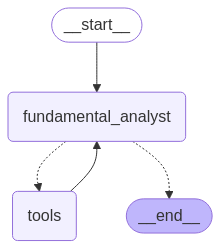

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [ ]:
events = graph.stream({'messages': [('user', 'Should I buy this stock?')],
                       'stock': 'NVIDIA Corp'}, stream_mode='values')
for event in events:
    if 'messages' in event:
        event['messages'][-1].pretty_print()

================================ Human Message =================================

Should I buy this stock?
================================== Ai Message ==================================
Tool Calls:
  get_stock_prices (call_qgF9QHzwpKZolXOfFTl7ezgR)
 Call ID: call_qgF9QHzwpKZolXOfFTl7ezgR
  Args:
    ticker: NVDA
  get_financial_metrics (call_9qSqQ9qnAQ08Bhfb5xdazhQf)
 Call ID: call_9qSqQ9qnAQ08Bhfb5xdazhQf
  Args:
    ticker: NVDA
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


================================= Tool Message =================================
Name: get_financial_metrics

{"pe_ratio": 27.208, "price_to_book": 34.587, "debt_to_equity": 12.946, "profit_margins": 0.558, "return_on_equity": 1.192, "return_on_assets": 0.574, "current_ratio": 4.44, "quick_ratio": 3.672, "gross_margins": 0.75, "operating_margins": 0.611}
================================== Ai Message ==================================

"stock": "NVDA",
"price_analysis": "Error fetching price data. Unable to analyze recent stock price movements or identify potential resistance levels at this time.",
"technical_analysis": "Error fetching price data. Unable to assess technical indicators like RSI, MACD, Drawdown, or VWAP.",
"financial_analysis": "NVIDIA Corp exhibits a P/E ratio of 27.208, which suggests a relatively high valuation compared to earnings. The price-to-book ratio is 34.587, indicating that the stock may be considered expensive relative to its book value. The debt-to-equity ra

In [ ]:
events = graph.stream({'messages': [(
    'user', 'Should I buy this stock?')], 'stock': 'NVIDIA Corp'}, stream_mode='values')

for event in events:
    if 'messages' in event:
        last_message = event['messages'][-1]

        # Ensure that the 'stock' key is correctly formatted
        stock_value = event.get('stock', '').strip()

        if stock_value:  # Check if stock symbol is valid
            print(f"Stock: {stock_value}")
        else:
            print("Stock symbol is missing or improperly formatted.")

        # Now handle the message part
        if hasattr(last_message, 'pretty_print'):
            last_message.pretty_print()
        else:
            print(last_message)

Stock: NVIDIA Corp
================================ Human Message =================================

Should I buy this stock?


[*********************100%***********************]  1 of 1 completed

Stock: NVIDIA Corp
================================== Ai Message ==================================
Tool Calls:
  get_stock_prices (call_dG7FoFSd9uwMINFFKeC78oNl)
 Call ID: call_dG7FoFSd9uwMINFFKeC78oNl
  Args:
    ticker: NVDA
  get_financial_metrics (call_2TbfVAEyQ4zF2vEr4KJRwSed)
 Call ID: call_2TbfVAEyQ4zF2vEr4KJRwSed
  Args:
    ticker: NVDA


Stock: NVIDIA Corp
================================= Tool Message =================================
Name: get_financial_metrics

{"pe_ratio": 27.216, "price_to_book": 34.597, "debt_to_equity": 12.946, "profit_margins": 0.558, "return_on_equity": 1.192, "return_on_assets": 0.574, "current_ratio": 4.44, "quick_ratio": 3.672, "gross_margins": 0.75, "operating_margins": 0.611}


[*********************100%***********************]  1 of 1 completed

Stock: NVIDIA Corp
================================== Ai Message ==================================
Tool Calls:
  get_stock_prices (call_bLhKflq4nahAsNkb5g2Z7tej)
 Call ID: call_bLhKflq4nahAsNkb5g2Z7tej
  Args:
    ticker: NVDA
Stock: NVIDIA Corp
================================= Tool Message =================================
Name: get_stock_prices

Error fetching price data: Data must be 1-dimensional, got ndarray of shape (73, 1) instead


Stock: NVIDIA Corp
================================== Ai Message ==================================

It appears that there was an error retrieving the stock price data for NVIDIA Corp (NVDA). Therefore, I can only provide a fundamental analysis based on the financial metrics available.

### Fundamental Analysis for NVIDIA Corp (NVDA)

**Financial Metrics:**
- **Price-to-Earnings Ratio (P/E)**: 27.216
- **Price-to-Book Ratio**: 34.597
- **Debt-to-Equity Ratio**: 12.946
- **Profit Margins**: 55.8%
- **Return on Equity (ROE)**: 119.2%
- **Return on Assets (ROA)**: 57.4%
- **Current Ratio**: 4.44
- **Quick Ratio**: 3.672
- **Gross Margins**: 75%
- **Operating Margins**: 61.1%

### Analysis
1. **Valuation Ratios**:
   - The P/E ratio of 27.216 suggests that the stock is valued relatively high compared to its earnings, indicating that investors are willing to pay more for growth. The high Price-to-Book ratio of 34.597 further supports this notion, implying strong investor expectations around